In [1]:
#Code done in ANACONDA - Jupyter
#Import libraries for data adquisition
import pandas as pd
import datetime
pd.core.common.is_list_like = pd.api.types.is_list_like
from pandas import Series, DataFrame
import numpy as np

In [2]:
#Import data from CSV and prepare it
data = pd.read_csv("NVDA.csv")

#Set date as index of the table
data.set_index('Date', inplace=True)

#Change date of the index
data.index = pd.to_datetime(data.index, format= '%d/%m/%Y')

#Print datable
#data.tail()

In [3]:
data['Adj Close'].plot(label='NVDA', figsize=(15,8), title='NVIDIA sotck prices', grid= True )

In [4]:
#Prediction model using HL_PCT and PCT_Change

#Get the High Low percentage, max and min value average per day
data['HL_PCT'] = (data['High'] - data['Low']) / data['Close'] * 100.0

#Change percentage, how much it changes since the opening.
data['PCT_change'] = (data['Close'] - data['Open']) / data['Open'] * 100.0

#data.tail()

In [5]:
#Forecasting parameters selection

#Days to be forecasted (Extrapolation)
fwind = 10 #Forecast windows

#Creating data for the forecasting
data['Forecast'] = data[['Adj Close']].shift(-fwind) #This will shift the Adj Close column fwind spaces, and fill it with NaNs

#Now we have an incompleted data column data['Forecast']

#Lets continue to the X and y definition
#X will be all the non 'Forecast' columns (features)

import sklearn.preprocessing as pp
X = np.array(data.drop(['Forecast'],1)) #Creating X as array, ignoring 'Forecast' column
X = pp.scale(X) #Standarization of data to be all the same size
Xlately = X[-fwind:] #Get the last fwind values (last 10)
X = X[:-fwind] #Get the values ignoring last fwind

#y is the 'Forecast' column
y = np.array(data['Forecast']) #Create y array, for completing values
y = y[:-fwind] #Ignore the last fwind values, that are the NaN

#data.head()
len(X),len(y)

(189, 189)

In [6]:
# #Import matplotlib for ploting the data
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import style
%matplotlib inline

mpl.rc('figure', figsize=(15,5))
mpl._version

#Adjusting style of matplotlib
style.use('ggplot')

In [7]:
# Import package for splitting data set
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [8]:
#Split dataset for test and training
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

In [9]:
#Training
#Linear regression model
from sklearn import linear_model
regLineal = linear_model.LinearRegression()
regLineal.fit(X_train, y_train)
y_pred = regLineal.predict(X_test)

#Evaluate mSR and variance
print("Mean square error %.2f" %mean_squared_error(y_test,y_pred))
print("Variance score %.2f" %r2_score(y_test,y_pred))

Mean square error 312.41
Variance score 0.82


In [10]:
#Training
#LASSO regression model
from sklearn import linear_model

for i in range(0,10):
    regLasso = linear_model.Lasso(alpha=(i/10))
    regLasso.fit(X_train, y_train)
    y_pred = regLasso.predict(X_test)

    #Evaluate mSR and variance
    print("Alpha %.2f" %(i/10))
    print("Mean square error %.2f" %mean_squared_error(y_test,y_pred))
    print("Variance score %.2f" %r2_score(y_test,y_pred))

Alpha 0.00
Mean square error 346.17
Variance score 0.80
Alpha 0.10
Mean square error 354.83
Variance score 0.80
Alpha 0.20
Mean square error 353.22
Variance score 0.80
Alpha 0.30
Mean square error 355.91
Variance score 0.80
Alpha 0.40
Mean square error 358.15
Variance score 0.80
Alpha 0.50
Mean square error 360.30
Variance score 0.80
Alpha 0.60
Mean square error 362.44
Variance score 0.79
Alpha 0.70
Mean square error 364.33
Variance score 0.79
Alpha 0.80
Mean square error 365.33
Variance score 0.79
Alpha 0.90
Mean square error 366.49
Variance score 0.79


C:\Users\thond\Anaconda3\envs\venv\lib\site-packages\ipykernel_launcher.py:7: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  import sys
C:\Users\thond\Anaconda3\envs\venv\lib\site-packages\sklearn\linear_model\coordinate_descent.py:477: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
C:\Users\thond\Anaconda3\envs\venv\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\thond\Anaconda3\envs\venv\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceW

In [11]:
#Training
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# Quadratic Regression 2
clfpoly2 = make_pipeline(PolynomialFeatures(2), Ridge())
clfpoly2.fit(X_train, y_train)

y_pred = clfpoly2.predict(X_test)

# #plt.plot(X)
# plt.scatter(X_train, y_train, color='black')
# plt.plot(X_test,y_pred, color='yellow', linewidth=1)

# #Evaluate mSR and variance
print("Mean square error %.2f" %mean_squared_error(y_test,y_pred))
#print("Variance score %.2f" %r2_score(y_test,y_pred)

Mean square error 280.78


In [12]:
#Forecast data predictions

#Create forecast columns
data['F_RL'] =np.nan
data['F_Lasso'] = np.nan
data['F_Poly2'] = np.nan

#Create the forecast sets
fRL_set = regLineal.predict(Xlately)
fLasso_set = regLasso.predict(Xlately)
fPoly2_set = clfpoly2.predict(Xlately)

#Lineal Regression
#Calculating forecasts
last_date = data.iloc[len(data)-(fwind-1)].name
last_unix = last_date
next_unix = last_unix + datetime.timedelta(days=1)
print(last_date)#, fwind, data.iloc[len(data)-(fwind-1)].name)

for i in fRL_set:
    next_date = next_unix
    next_unix += datetime.timedelta(days=1)
    data['F_RL'].loc[next_date] = i #+[np.nan for _ in range(len(data.columns)-1)]
    #print(next_date)


#LASSO Regression
#Calculating forecasts
last_date = data.iloc[len(data)-(fwind-1)].name
last_unix = last_date
next_unix = last_unix + datetime.timedelta(days=1)

for i in fLasso_set:
    next_date = next_unix
    next_unix += datetime.timedelta(days=1)
    data['F_Lasso'].loc[next_date] = i #+[np.nan for _ in range(len(data.columns)-1)]
    
#Poly2 Regression
#Calculating forecasts
last_date = data.iloc[len(data)-(fwind-1)].name
last_unix = last_date
next_unix = last_unix + datetime.timedelta(days=1)

for i in fPoly2_set:
    next_date = next_unix
    next_unix += datetime.timedelta(days=1)
    data['F_Poly2'].loc[next_date] = i #+[np.nan for _ in range(len(data.columns)-1)]


2019-06-10 00:00:00


C:\Users\thond\Anaconda3\envs\venv\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


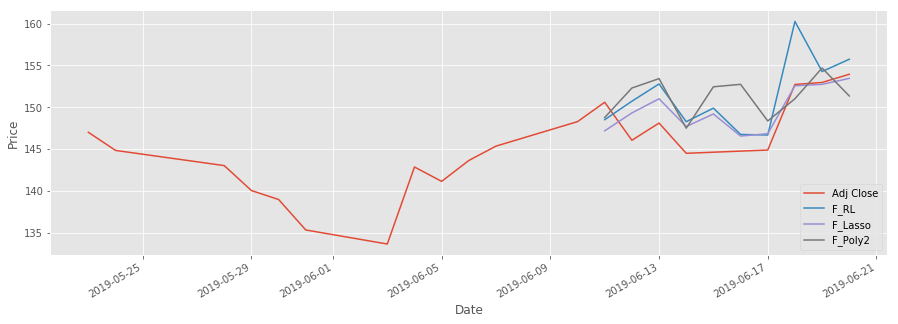

<Figure size 720x576 with 0 Axes>

In [13]:
import calendar
#PLotting forecast    
t = 20

data['Adj Close'].tail(t).plot()
#data['Forecast'].tail(50).plot()
data['F_RL'].tail(t).plot()
data['F_Lasso'].tail(t).plot()
data['F_Poly2'].tail(t).plot()
#plt.xticks(np.array(data.tail(t)), calendar.mdays[1:199], rotation=20)
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.figure(figsize=(10,8))

plt.show()

In [36]:
print(data[['Adj Close','F_RL','F_Lasso', 'F_Poly2']].tail(10))
print(" ")
print("F_RL")
print(data['F_RL'].tail(10))
print(" ")
print("F_Lasso ")
print(data['F_Lasso'].tail(10))
print(" ")
print("F_Poly2")
print(data['F_Poly2'].tail(10))

             Adj Close        F_RL     F_Lasso     F_Poly2
Date                                                      
2019-06-07  145.356110         NaN         NaN         NaN
2019-06-10  148.283203         NaN         NaN         NaN
2019-06-11  150.600922  148.516018  147.185971  148.779957
2019-06-12  146.055420  150.723626  149.323189  152.302325
2019-06-13  148.113373  152.791312  151.015468  153.427292
2019-06-14  144.496964  148.275817  147.696569  147.496220
2019-06-17  144.886581         NaN         NaN         NaN
2019-06-18  152.728821         NaN         NaN         NaN
2019-06-19  152.968582         NaN         NaN         NaN
2019-06-20  153.947617         NaN         NaN         NaN
 
F_RL
Date
2019-06-11    148.516018
2019-06-12    150.723626
2019-06-13    152.791312
2019-06-14    148.275817
2019-06-17    146.682723
2019-06-18    160.263295
2019-06-19    154.277313
2019-06-20    155.746341
2019-06-15    149.898311
2019-06-16    146.752603
Name: F_RL, dtype: float64
 
F